# endemic SIR model

#### This script is for an endemic SIR model to simulate an epidemic over time. The model consists of three differential equations describing the rate of change of variables over time. The 3 variables are:
#### u[1] = S: Susceptible population
#### u[2] = I: Infected population
#### u[3] = R: Recovered population

In [1]:
using DifferentialEquations
using Plots

### Define parameters

In [85]:
r = 20;         # number of contacts per unit time
beta = 5e-9    # Prob. of disease transmission
gamma = 0.1    # Recovery rate (Try 0.12, 0.07)
lambda = 100/6 # Birth and immigration per year
mu = 1/60   # Death and emigration per year
N = 6e7      # Population size N=S+I+R

6.0e7

### Define differential equations

In [86]:
function eSIR!(du,u,p,t)
    du[1] = lambda - r.*beta.*u[1].*u[2] - mu.*u[1]
    du[2] = r.*beta.*u[1].*u[2] - gamma.*u[2] - mu.*u[2]
    du[3] = gamma.*u[2] - mu.*u[3]
end

eSIR! (generic function with 1 method)

In [87]:
u0 = [N-1,1,0]                   #Initial conditions
p = [r,beta,gamma,lambda,mu]
tspan = (0.0,200.0)               #Time course

(0.0, 200.0)

### Solve ODE

In [88]:
prob = ODEProblem(eSIR!,u0,tspan,p)
sol = solve(prob);

### Plot solutions

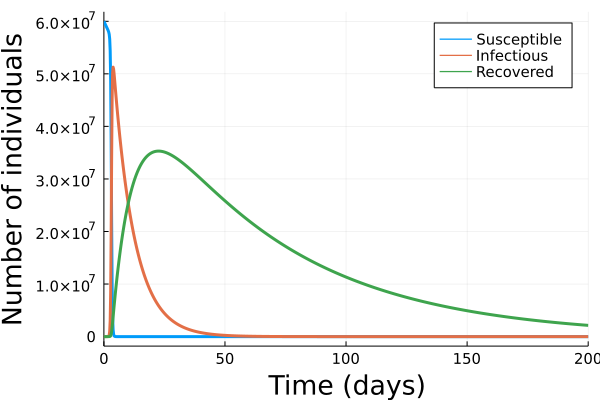

In [89]:
plot(sol,lw=3,label=["Susceptible" "Infectious" "Recovered"])
plot!(xlabel="Time (days)", ylabel="Number of individuals", 
    xtickfontsize=10,ytickfontsize=10,xguidefontsize=18,yguidefontsize=18,legendfontsize=10,
    fmt = :png)